In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [12]:
quantization = [[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [68, 56, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]]



# Forward DCT (8 × 8）
# The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.
# For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

# Referred from Matlab 2-D DCT page
# https://in.mathworks.com/help/images/ref/dct2.html

def dct(image):
    image_data = image.astype(float)
    m, n = image_data.shape
    image_dct = np.zeros(image.shape)
    x_division = int(m/8)
    y_division = int(n/8)
    print ('m = ', m)
    print ('n = ', n)
    print (x_division)
    print (y_division)
    
    lis_dct = []
    x = 0
    F = 0
    lis_F = []
    TF = 0.1
    lis_selected = []

    for i in range(0, x_division):
        for j in range(0, y_division):
            x_s = i * 8
            x_e = (i+1) * 8
            y_s = j * 8
            y_e = (j+1) * 8
            image_dct[x_s:x_e, y_s:y_e] = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization
            lis_dct = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization
            y = 0
            sum_coeff = 0
            for l in lis_dct:
                for k in l:
                    if y == 0:
                        y += 1
                        continue
                    else:
                        y += 1
                        sum_coeff += (k * k)
#             print ('sum_coeff = ', sum_coeff)
            F = sum_coeff/64
            # Indexes of selected blocks inserted in a list, useful while traversing later
            if F < TF:
                lis_selected.append((i, j))
            lis_F.append(F)
            if x < 5:
                print (F)
                x += 1
#                 print ('y = ', y)

#             if x < 1:
#                 print (img_data[window_x_s:window_x,window_y_s:window_y])
#                 print (cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization)
#                 x = x + 1
#     print ("Avg is ", sum(lis_F) / len(lis_F))
#     print (lis_F)
    print ("Length of lis_F = ", len(lis_F))
    print ("Length of lis_selected = ", len(lis_selected))
    print (lis_selected)
    return img_dct




In [13]:
image = cv2.imread('github.jpeg', 0)

# DCT
image_dct = dct(image)

plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(img_dct, 'gray')
plt.title('dct')
plt.xticks([]), plt.yticks([])

m =  2100
n =  1179
262
147
10.4259881146
11.5296260813
0.0495669415329
0.0564876199372
0.136369778748
Length of lis_F =  38514
Length of lis_selected =  18340
[(0, 2), (0, 3), (0, 11), (0, 22), (0, 23), (0, 24), (0, 27), (0, 28), (0, 31), (0, 58), (0, 62), (0, 63), (0, 66), (0, 67), (0, 72), (0, 73), (0, 74), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110), (0, 111), (0, 112), (0, 113), (0, 114), (0, 115), (0, 116), (0, 117), (0, 118), (0, 119), (0, 120), (0, 121), (0, 122), (0, 123), (0, 124), (0, 125), (0, 126), (0, 127), (0, 128), (0, 129), (0, 130), (0, 131), (0, 132), (0, 133), (0, 134), (0, 135), (0, 136), (0, 137), (0, 138), (0, 139), (0, 140), (0, 141), (0, 142), (0, 143), (0, 144), (0, 145), (0, 146), (1, 3), (1, 5), (1, 11), (1, 20), (1, 21), (1, 

NameError: name 'img_dct' is not defined

In [14]:
# hist() function
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_image_histogram_calcHist.php

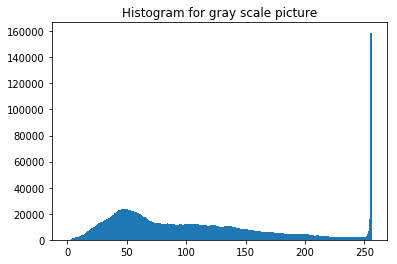

In [15]:
# hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(image,256,[0,256])
a = plt.hist(image.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

In [16]:
hist = list(filter(lambda a: a != 0, hist))
print(len(hist))

256
